# 0. Getting Started

## Information to Note
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [1]:
# get libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading data
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# will be used after model fitting for result submission
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_df = train.drop(['PassengerId', 'Name'], axis = 1)

# Graphing

In [7]:
# finding row mean for room service until spa
train_df['mean'] = train_df.iloc[:,5:9].mean(axis = 1)
train_df['mean'].head()

0      0.00
1     35.75
2    905.00
3    413.50
4    131.00
Name: mean, dtype: float64

Text(0.5, 1.0, 'Survival count by CryoSleep')

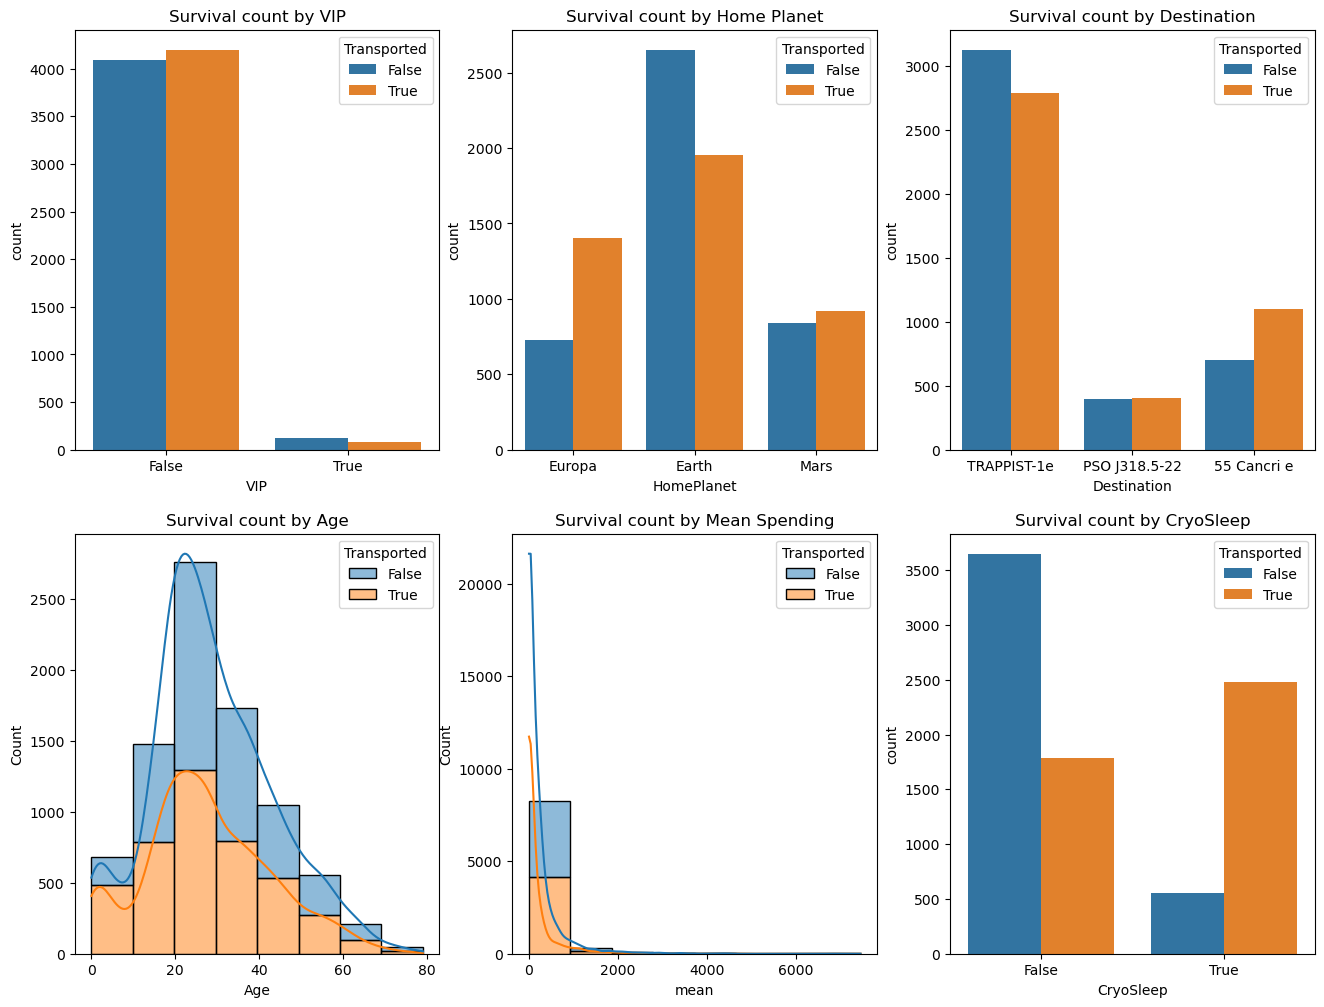

In [8]:
plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
sns.countplot(data = train_df, x = 'VIP', hue = 'Transported')
plt.title("Survival count by VIP")

plt.subplot(2,3,2)
sns.countplot(data = train_df, x = 'HomePlanet', hue = 'Transported')
plt.title("Survival count by Home Planet")

plt.subplot(2,3,3)
sns.countplot(data = train_df, x = 'Destination', hue = 'Transported')
plt.title("Survival count by Destination")

plt.subplot(2,3,4)
sns.histplot(data = train_df, x = 'Age', hue = 'Transported', bins = 8, multiple='stack',kde=True)
plt.title("Survival count by Age")

plt.subplot(2,3,5)
sns.histplot(data = train_df, x = 'mean', hue = 'Transported', bins = 8, multiple='stack',kde=True)
plt.title("Survival count by Mean Spending")

plt.subplot(2,3,6)
sns.countplot(data = train_df, x = 'CryoSleep', hue = 'Transported')
plt.title("Survival count by CryoSleep")

# Data Cleaning - Categorical Variables

In [9]:
categorical = [var for var in train_df.columns if train_df[var].dtype == 'O']
train_df[categorical].head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False


In [10]:
print(train_df['HomePlanet'].unique())
print(train_df['Destination'].unique())

['Europa' 'Earth' 'Mars' nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [11]:
for var in categorical:
    print(train_df[var].value_counts()/float(len(train_df)))

Earth     0.529391
Europa    0.245140
Mars      0.202347
Name: HomePlanet, dtype: float64
False    0.625676
True     0.349362
Name: CryoSleep, dtype: float64
G/734/S     0.000920
G/109/P     0.000805
B/201/P     0.000805
G/1368/P    0.000805
G/981/S     0.000805
              ...   
G/556/P     0.000115
E/231/S     0.000115
G/545/S     0.000115
G/543/S     0.000115
F/947/P     0.000115
Name: Cabin, Length: 6560, dtype: float64
TRAPPIST-1e      0.680433
55 Cancri e      0.207063
PSO J318.5-22    0.091568
Name: Destination, dtype: float64
False    0.953756
True     0.022892
Name: VIP, dtype: float64


In [12]:
# check cardinality
for var in categorical:
    print(var, ' contains', len(train_df[var].unique()), 'labels')

HomePlanet  contains 4 labels
CryoSleep  contains 3 labels
Cabin  contains 6561 labels
Destination  contains 4 labels
VIP  contains 3 labels


In [13]:
train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
mean              0
dtype: int64

In [14]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand = True)
train_df = train_df.drop('Cabin', axis = 1)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mean,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.00,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,35.75,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,905.00,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,413.50,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,131.00,F,1,S


In [15]:
train_df[['CryoSleep','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']] = train_df[['CryoSleep','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].fillna(value = 0)

In [16]:
train_df['Age'] = train_df['Age'].fillna(value = 28.83)

In [17]:
# Scaling for numerical columns:
from sklearn.preprocessing import RobustScaler

col_headers=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scl = RobustScaler()
train_df[col_headers] = scl.fit_transform(train_df[col_headers])
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mean,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000,False,0.00,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,2.658537,0.147541,1.136364,10.358491,1.100,True,35.75,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,1.048780,58.622951,0.000000,126.698113,1.225,False,905.00,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,21.032787,16.863636,62.811321,4.825,False,413.50,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,7.390244,1.147541,6.863636,10.660377,0.050,True,131.00,F,1,S


In [18]:
train_df[['HomePlanet', 'Destination']] = train_df[['HomePlanet', 'Destination']].fillna(method = 'bfill')

In [19]:
train_df.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
mean              0
Deck            199
Num             199
Side            199
dtype: int64

In [20]:
# change cryo sleep , vip and transported to int
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df['VIP'] = train_df['VIP'].astype(int)
train_df['Transported'] = train_df['Transported'].astype(int)

train_df[['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']] = train_df[['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']].astype(int)

train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mean,Deck,Num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0,0,0,0,0,0,0.00,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,2,0,1,10,1,1,35.75,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,1,58,0,126,1,0,905.00,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0,21,16,62,4,0,413.50,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,7,1,6,10,0,1,131.00,F,1,S


In [21]:
from sklearn.preprocessing import LabelEncoder
column_headers = ['Deck', 'Num', 'Side']
le = LabelEncoder()

train_df[column_headers] = train_df[column_headers].apply(le.fit_transform)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mean,Deck,Num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0,0,0,0,0,0,0.00,1,0,0
1,Earth,0,TRAPPIST-1e,24.0,0,2,0,1,10,1,1,35.75,5,0,1
2,Europa,0,TRAPPIST-1e,58.0,1,1,58,0,126,1,0,905.00,0,0,1
3,Europa,0,TRAPPIST-1e,33.0,0,0,21,16,62,4,0,413.50,0,0,1
4,Earth,0,TRAPPIST-1e,16.0,0,7,1,6,10,0,1,131.00,5,1,1


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   int64  
 6   FoodCourt     8693 non-null   int64  
 7   ShoppingMall  8693 non-null   int64  
 8   Spa           8693 non-null   int64  
 9   VRDeck        8693 non-null   int64  
 10  Transported   8693 non-null   int64  
 11  mean          8693 non-null   float64
 12  Deck          8693 non-null   int64  
 13  Num           8693 non-null   int64  
 14  Side          8693 non-null   int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1018.8+ KB


In [23]:
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # ori: spare = False

# Get list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_train_df = pd.concat([num_X_train, OH_cols_train], axis=1)

In [24]:
OH_train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mean,Deck,Num,Side,0,1,2,3,4,5
0,0,39.0,0,0,0,0,0,0,0,0.00,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,2,0,1,10,1,1,35.75,5,0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,58.0,1,1,58,0,126,1,0,905.00,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0,21,16,62,4,0,413.50,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0
4,0,16.0,0,7,1,6,10,0,1,131.00,5,1,1,1.0,0.0,0.0,0.0,0.0,1.0


In [25]:
print(OH_train_df.columns)

Index([   'CryoSleep',          'Age',          'VIP',  'RoomService',
          'FoodCourt', 'ShoppingMall',          'Spa',       'VRDeck',
        'Transported',         'mean',         'Deck',          'Num',
               'Side',              0,              1,              2,
                    3,              4,              5],
      dtype='object')


In [26]:
OH_train_df.columns = [ 'CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck','Transported','mean', 'Deck','Num','Side',
                    'Europa',              'Earth',              'Mars',        'TRAPPIST-1e', 'PSOJ318.5-22', '55 Cancrie']

In [27]:
OH_train_df[['Deck','Num','Side','Europa','Earth', 'Mars','TRAPPIST-1e', 'PSOJ318.5-22', '55 Cancrie']] = OH_train_df[['Deck','Num','Side','Europa','Earth', 'Mars','TRAPPIST-1e', 'PSOJ318.5-22', '55 Cancrie']].astype(int)

In [28]:
OH_train_df = OH_train_df.drop('Num', axis = 1)

In [29]:
OH_train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mean,Deck,Side,Europa,Earth,Mars,TRAPPIST-1e,PSOJ318.5-22,55 Cancrie
0,0,39.0,0,0,0,0,0,0,0,0.00,1,0,0,1,0,0,0,1
1,0,24.0,0,2,0,1,10,1,1,35.75,5,1,1,0,0,0,0,1
2,0,58.0,1,1,58,0,126,1,0,905.00,0,1,0,1,0,0,0,1
3,0,33.0,0,0,21,16,62,4,0,413.50,0,1,0,1,0,0,0,1
4,0,16.0,0,7,1,6,10,0,1,131.00,5,1,1,0,0,0,0,1


# Model Fitting

In [30]:
X = OH_train_df.drop(['Transported','mean'], axis = 1)
y = OH_train_df['Transported']

In [31]:
# Train-test split data:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,Europa,Earth,Mars,TRAPPIST-1e,PSOJ318.5-22,55 Cancrie
4278,0,54.0,0,0,9,0,287,69,2,1,0,1,0,1,0,0
5971,0,20.0,0,0,0,0,13,0,5,0,1,0,0,0,0,1
464,0,43.0,0,44,0,2,0,0,5,1,0,0,1,0,0,1
4475,0,24.0,0,4,0,21,34,1,5,1,1,0,0,0,0,1
8469,1,25.0,0,0,0,0,0,0,2,1,0,1,0,1,0,0


In [33]:
from sklearn.metrics import accuracy_score, classification_report
import xgboost
from xgboost import XGBClassifier

model = xgboost.XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.7987349051178838
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       863
           1       0.80      0.81      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [35]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.79597701 0.79310345 0.79310345 0.76293103 0.7971223  0.79136691
 0.81151079 0.81294964 0.80863309 0.79280576]
Average cross-validation score: 0.7960


# Submission

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [37]:
test_df = test.drop(['PassengerId', 'Name'], axis =1)

In [38]:
test_df[['CryoSleep','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df[['CryoSleep','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value = 0)

In [39]:
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand = True)
test_df = test_df.drop(['Cabin', 'Num'], axis = 1)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S


In [40]:
# change cryo sleep , vip and transported to int
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

test_df[['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']] = test_df[['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']].astype(int)

test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,1,TRAPPIST-1e,27.0,0,0,0,0,0,0,G,S
1,Earth,0,TRAPPIST-1e,19.0,0,0,9,0,2823,0,F,S
2,Europa,1,55 Cancri e,31.0,0,0,0,0,0,0,C,S
3,Europa,0,TRAPPIST-1e,38.0,0,0,6652,0,181,585,C,S
4,Earth,0,TRAPPIST-1e,20.0,0,10,0,635,0,0,F,S


In [41]:
test_df['Age'] = test_df['Age'].fillna(value = 28.83)

In [42]:
col_headers=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scl = RobustScaler()
test_df[col_headers] = scl.fit_transform(test_df[col_headers])
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,1,TRAPPIST-1e,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,G,S
1,Earth,0,TRAPPIST-1e,19.0,0,0.000000,0.136364,0.000000,65.651163,0.000000,F,S
2,Europa,1,55 Cancri e,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,C,S
3,Europa,0,TRAPPIST-1e,38.0,0,0.000000,100.787879,0.000000,4.209302,18.870968,C,S
4,Earth,0,TRAPPIST-1e,20.0,0,0.208333,0.000000,23.518519,0.000000,0.000000,F,S


In [43]:
column_headers = ['Deck', 'Side']
le = LabelEncoder()

test_df[column_headers] = test_df[column_headers].apply(le.fit_transform)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,1,TRAPPIST-1e,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,6,1
1,Earth,0,TRAPPIST-1e,19.0,0,0.000000,0.136364,0.000000,65.651163,0.000000,5,1
2,Europa,1,55 Cancri e,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,1
3,Europa,0,TRAPPIST-1e,38.0,0,0.000000,100.787879,0.000000,4.209302,18.870968,2,1
4,Earth,0,TRAPPIST-1e,20.0,0,0.208333,0.000000,23.518519,0.000000,0.000000,5,1


In [44]:
test_df.isnull().sum()

HomePlanet      87
CryoSleep        0
Destination     92
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Deck             0
Side             0
dtype: int64

In [45]:
test_df[['HomePlanet', 'Destination']] = test_df[['HomePlanet', 'Destination']].fillna(method = 'bfill')

In [46]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # ori: spare = False

# Get list of categorical variables
s = (test_df.dtypes == 'object')
object_cols = list(s[s].index)

OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_df[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_test.index = test_df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_test = test_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_test_df = pd.concat([num_X_test, OH_cols_test], axis=1)

In [47]:
OH_test_df.isnull().sum()

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
0               0
1               0
2               0
3               0
4               0
5               0
dtype: int64

In [48]:
OH_test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,0,1,2,3,4,5
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,6,1,1.0,0.0,0.0,0.0,0.0,1.0
1,0,19.0,0,0.000000,0.136364,0.000000,65.651163,0.000000,5,1,1.0,0.0,0.0,0.0,0.0,1.0
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,1,0.0,1.0,0.0,1.0,0.0,0.0
3,0,38.0,0,0.000000,100.787879,0.000000,4.209302,18.870968,2,1,0.0,1.0,0.0,0.0,0.0,1.0
4,0,20.0,0,0.208333,0.000000,23.518519,0.000000,0.000000,5,1,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
OH_test_df.columns = [ 'CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck', 'Deck','Side',
                    'Europa',              'Earth',              'Mars',        'TRAPPIST-1e', 'PSOJ318.5-22', '55 Cancrie']

In [50]:
submission = pd.Series(model.predict(OH_test_df))
binary = pd.Series([None]*len(submission))
for i in range(0, len(submission)):
    if submission[i] == 1:
        binary[i] = True
    else:
        binary[i] = False

In [51]:
id_ = pd.Series(test['PassengerId'])
id_


0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [52]:
submission_df = pd.DataFrame(
    {
        'PassengerId': id_,
        'Transported': binary,
    }
)
submission_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [53]:
submission_df.to_csv('submission.csv', index = False)
!echo "Done"

Done


# Multiple Models

# Deep Learning Model